# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="assets/bricks.jpg" alt="lego bricks">

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
# Load and inspect
df_colors = pd.read_csv("data/colors.csv")
df_colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [3]:
# Checking .nunique()
df_colors.nunique()

# 135 by id

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [4]:
# Number of unique colors according to color name
df_colors["name"].nunique()

135

In [5]:
# Number of unique RGB values
df_colors["rgb"].nunique()

124

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [6]:
# Using filters
filt = df_colors["is_trans"] == "t"
n_transp = df_colors[filt].count()["is_trans"]

filt = df_colors["is_trans"] == "f"
n_opaque = df_colors[filt].count()["is_trans"]

print(f"Transparent: {n_transp}\nOpaque: {n_opaque}")

# 28 transparent, 107 opaque

Transparent: 28
Opaque: 107


In [7]:
# Using .value_counts
df_colors["is_trans"].value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

In [8]:
# Using groups
df_colors.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


### Understanding LEGO Themes vs. LEGO Sets 

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="assets/lego_themes.png" alt="lego themes">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="assets/lego_sets.png" alt="lego sets">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [9]:
# Load and inspect
df_sets = pd.read_csv("data/sets.csv")

# Check dtypes
display(df_sets.dtypes)
df_sets

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [10]:
# Sort by year
# There could be multiple releases in the same year, get all the entries
# on the first year
first_year = df_sets["year"].min()
filt = df_sets["year"] == first_year

df_sets.loc[filt]

# 1949. Refer to df for set names

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
# Answered by previous cell
display(df_sets.loc[filt])
filt.sum()

# 5 sets

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


5

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [12]:
# In case that there are ties for the highest number of parts, we should
# get the highest value and make a filter
most_nparts = df_sets["num_parts"].max()
filt = df_sets["num_parts"] == most_nparts

df_sets.loc[filt]

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [13]:
group_year_count = df_sets.groupby("year").count()
group_year_count

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [14]:
group_year_count.loc[[1955, 2019]]
# 1955 has way less sets released compared to 2019

,set_num,name,theme_id,num_parts
year,,,,
1955,28,28,28,28
2019,840,840,840,840


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

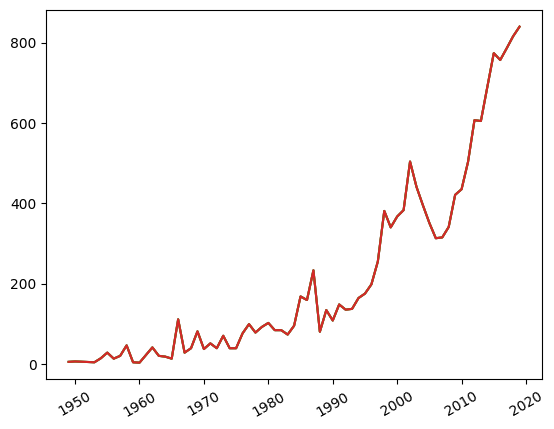

In [15]:
plt.xticks(rotation=30)
plt.plot(group_year_count.iloc[:-2])

# .loc doesnt support negative index; if using .loc, do
# group_sets.loc[:2019]

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [16]:
group_year_unique = df_sets.groupby("year")["theme_id"].nunique()
group_year_unique

year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2017    89
2018    93
2019    78
2020    82
2021     1
Name: theme_id, Length: 71, dtype: int64

In [17]:
# Change Series name into a more suitable one to represent the
# number of themes (n_themes).
group_year_unique.rename("n_themes", inplace=True)

year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2017    89
2018    93
2019    78
2020    82
2021     1
Name: n_themes, Length: 71, dtype: int64

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

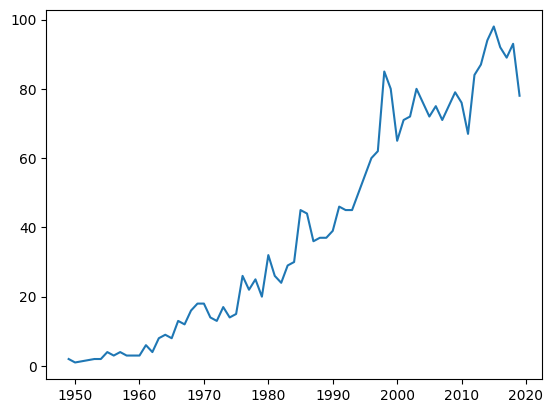

In [18]:
# Using .loc here for variety. For the same result using iloc,
# use .iloc[:-2] (exclude last 2 years)
plt.plot(group_year_unique.loc[:2019])

### Line Charts with Two Seperate Axes

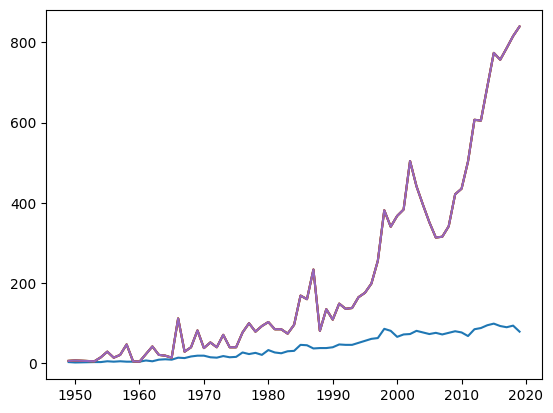

In [19]:
# Single set of axes
plt.plot(group_year_unique.loc[:2019])
plt.plot(group_year_count.loc[:2019])

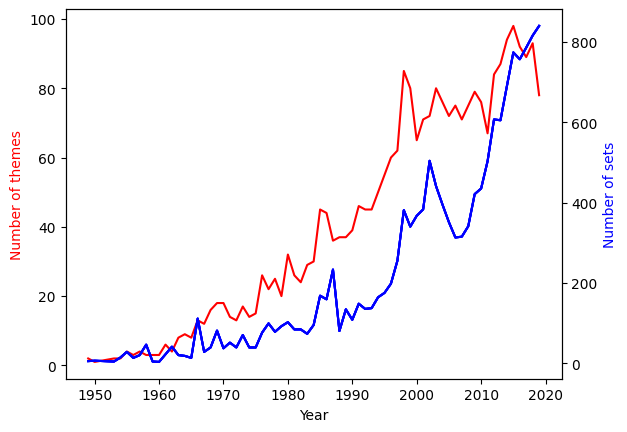

In [20]:
# Two sets of axes where x-axis is shared
# Styled
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of themes", color="r")
ax2.set_ylabel("Number of sets", color="b")

ax1.plot(group_year_unique.loc[:2019], "r")
ax2.plot(group_year_count.loc[:2019], "b")

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set per year. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [21]:
group_year_nparts = df_sets.groupby("year").agg({"num_parts": "mean"})
display(group_year_nparts)
# This is also valid
# group_year_nparts = df_sets.groupby("year").agg({"num_parts": pd.Series.mean})

# Average number of parts
display(group_year_nparts.loc[[1954, 2017]])
# Year 1954: 12.36 parts
# Year 2017: 221.84 parts

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


,num_parts
year,
1954,12.357143
2017,221.840967


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

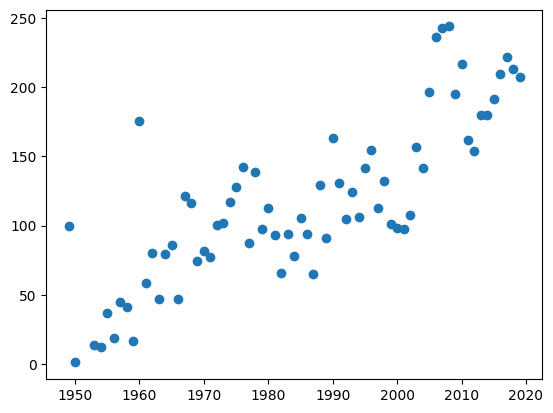

In [22]:
plt.scatter(group_year_nparts.index[:-2], group_year_nparts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [23]:
theme_count = df_sets["theme_id"].value_counts()
theme_count
# Theme with theme_id of 158.

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: count, Length: 571, dtype: int64

<img src="assets/rebrickable_schema.png" alt="lego themes">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [24]:
df_themes = pd.read_csv("data/themes.csv", index_col="id")
df_themes.head()

,name,parent_id
id,,
1,Technic,NaN
2,Arctic Technic,1.0
3,Competition,1.0
4,Expert Builder,1.0
5,Model,1.0


In [25]:
# Search for star wars
filt = df_themes["name"].str.lower().isin(["star wars"])
swars_df_indexes = df_themes.loc[filt]
swars_df_indexes

,name,parent_id
id,,
18,Star Wars,1.0
158,Star Wars,NaN
209,Star Wars,207.0
261,Star Wars,258.0


In [26]:
# Inspect sets which has the theme id of 158
df_sets.loc[df_sets["theme_id"] == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [27]:
# Inspect all multiple theme ids of star wars
for i in swars_df_indexes.index:
    filt = df_sets["theme_id"] == i
    display(f"Theme ID: {i}",df_sets.loc[filt].head())
    print()


'Theme ID: 18'

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339


'Theme ID: 158'

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94


'Theme ID: 209'

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309


'Theme ID: 261'

,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578


### Merging (i.e., Combining) DataFrames based on a Key


In [28]:
# Turn this into a df. To be merged later
theme_count

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: count, Length: 571, dtype: int64

In [29]:
df_theme_count = theme_count.to_frame()

In [30]:
df_theme_count = pd.DataFrame(
    {
        "set_count": theme_count,
    },
    index=theme_count.index,
)
display(df_theme_count)


,set_count
theme_id,
158,753
501,656
494,398
435,356
503,329
...,...
307,1
215,1
361,1


In [31]:
# DataFrames to be merged
# df1
display(df_theme_count.head(3))

# df2
display(df_themes.head(3))

,set_count
theme_id,
158,753
501,656
494,398


,name,parent_id
id,,
1,Technic,NaN
2,Arctic Technic,1.0
3,Competition,1.0


In [32]:
# Merge. There a couple of ways to merge these 2.
df_merged = df_theme_count.merge(df_themes, left_index=True, right_index=True)
df_merged

,set_count,name,parent_id
158,753,Star Wars,NaN
501,656,Gear,NaN
494,398,Friends,NaN
435,356,Ninjago,NaN
503,329,Key Chain,501.0
...,...,...,...
307,1,Aquazone,NaN
215,1,Pirates,207.0
361,1,Skull Spiders,324.0
210,1,Belville,207.0


<BarContainer object of 10 artists>

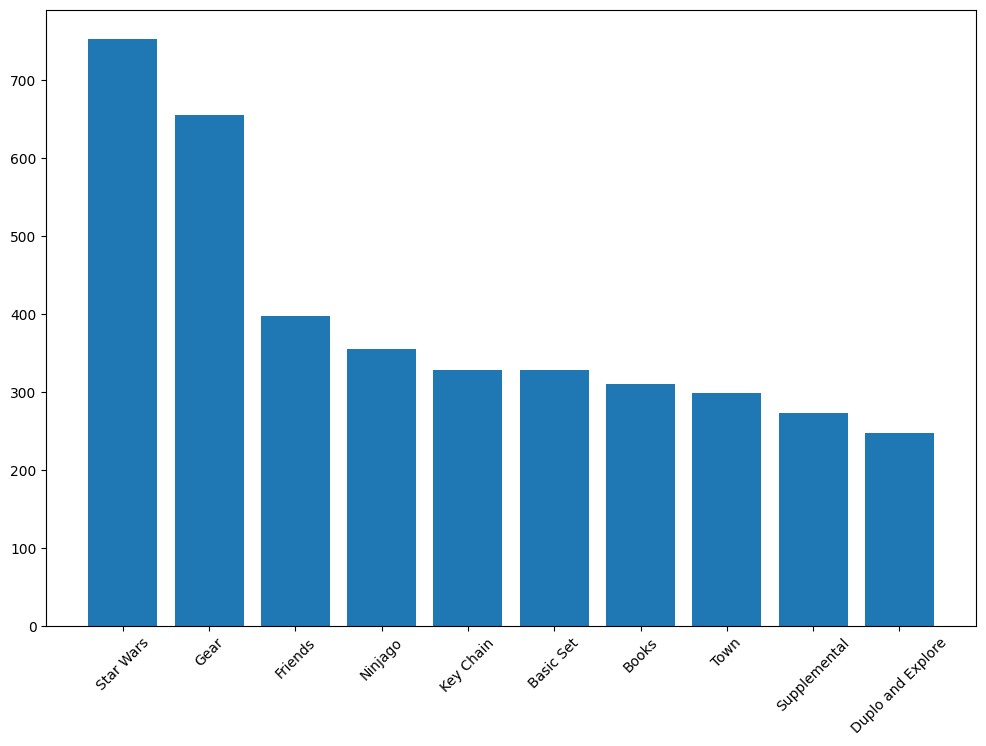

In [33]:
# Plot on bar chart
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)

plt.bar(df_merged["name"][:10], df_merged["set_count"][:10])